In [1]:
import torch
import numpy as np

In [2]:
from models import *
from datasets import *
from trainer import *
from utils import *

In [3]:
import time

def run(setups, dataset_name, lr_schedule, reps=1, file_name=None):
    results = {}
    for run_number in range(1, reps+1):
        for case in setups:
            case_name = case if reps==1 else case + f" run:{run_number}"
            results[case_name] = {}
        
    for run_number in range(1, reps+1):
        train_set, test_set = get_dataset(dataset_name)
        initial_state_dict = get_temp_state_dict(dataset_name)
        
        for case, population_args in setups.items():
            print(f"\n--- Case: {case}, run number: {run_number}")
            start_time = time.time()
            trainer = HybridSGDTrainer(population_args, 
                                       dataset_name, train_set, test_set, 
                                       initial_state_dict)
            history = trainer.train(lr_schedule)
            log_dict = {}
            for key in history[0].keys():
                case_name = case if reps==1 else case + f" run:{run_number}"
                results[case_name][key] = [x[key] for x in history]
            end_time = time.time()
            print("Running time: {:.4f}".format(float(end_time-start_time)))
    if file_name:
        torch.save(results, f"Results/{dataset_name}/{file_name}")
    return results

In [4]:
setups = {}

## Setups go here. The followings are just examples.
setups['2 FO'] = [{'grad_mode': 'first order','count': 2}]
setups['6 ZO'] = [{'grad_mode': 'zeroth order forward-mode AD','count': 6, 'random vecs': 200}]
setups['2 FO 6 ZO'] = [{'grad_mode': 'first order','count': 2},
                       {'grad_mode': 'zeroth order forward-mode AD','count': 6, 'random vecs': 200}]

dataset_name = 'flowers'
lr_schedule = [(200, 0.001, 10)]

In [5]:
logs = run(setups, dataset_name, lr_schedule, reps=1, file_name=None)


--- Case: 2 FO, run number: 1
Steps:     0, Training loss: 0.0000, Validation loss: 4.6844, Validation accuracy: 0.01
Steps:    10, Training loss: 4.6614, Validation loss: 4.6785, Validation accuracy: 0.01
Steps:    20, Training loss: 4.6541, Validation loss: 4.6721, Validation accuracy: 0.01
Steps:    30, Training loss: 4.6458, Validation loss: 4.6655, Validation accuracy: 0.01
Steps:    40, Training loss: 4.6338, Validation loss: 4.6589, Validation accuracy: 0.01
Steps:    50, Training loss: 4.6198, Validation loss: 4.6524, Validation accuracy: 0.01
Steps:    60, Training loss: 4.6057, Validation loss: 4.6460, Validation accuracy: 0.02
Steps:    70, Training loss: 4.5935, Validation loss: 4.6397, Validation accuracy: 0.02
Steps:    80, Training loss: 4.5796, Validation loss: 4.6335, Validation accuracy: 0.02
Steps:    90, Training loss: 4.5646, Validation loss: 4.6275, Validation accuracy: 0.02
Steps:   100, Training loss: 4.5499, Validation loss: 4.6216, Validation accuracy: 0.02
S

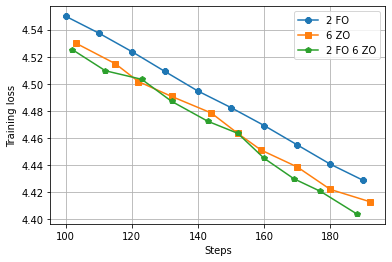

In [6]:
name = None 
plot_trends(logs, 'Steps', 'Training loss',   100, dataset_folder=dataset_name, name=name)